<a href="https://colab.research.google.com/github/Romulan12/Binary-classifiaction-of-Musk-dataset/blob/master/Binary_classification_on_Musk_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [0]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.utils import plot_model
from keras import backend as K


Reading data


In [0]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/musk_csv.csv')

In [3]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
data.shape

(6598, 170)

In [0]:
df = data

Handling non-numerical data

In [0]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [11]:
df = handle_non_numerical_data(df)
print(df.head(20))

    ID  molecule_name  conformation_name  f1  ...  f164  f165  f166  class
0    1             19                195  46  ...   -50  -112    96      1
1    2             19               2260  41  ...   -61  -136    79      1
2    3             19               5279  46  ...   -67  -145    39      1
3    4             19                425  41  ...   -60  -135    80      1
4    5             19               1079  41  ...   -60  -135    80      1
5    6             19                503  46  ...   -67  -145    40      1
6    7             19               1788  47  ...   -68  -145    37      1
7    8             19               1678  41  ...   -60  -135    81      1
8    9             19               4601  41  ...   -60  -135    81      1
9   10             19               5816  47  ...   -68  -146    37      1
10  11             19               4602  41  ...   -60  -135    81      1
11  12             19               5751  44  ...   -65  -132    14      1
12  13             19    

Extracting important features

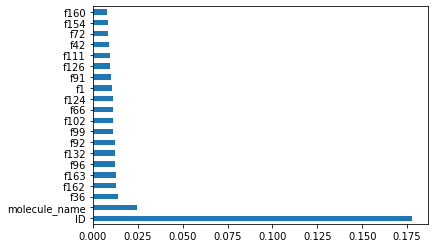

<Figure size 14400x7200 with 0 Axes>

In [26]:
X = df.iloc[:,0:169]  #independent columns
y = df.iloc[:,-1]    #target column i.e class

model = ExtraTreesClassifier()
model.fit(X,y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns) #use inbuilt class feature_importances of tree based classifiers
feat_importances.nlargest(20).plot(kind='barh')

plt.figure(figsize= (200,100))
plt.show()

In [13]:
print(feat_importances.nlargest(50))

ID               0.174496
molecule_name    0.021893
f36              0.015769
f66              0.014494
f1               0.014223
f132             0.013256
f92              0.013100
f126             0.012042
f124             0.010998
f162             0.010801
f96              0.010474
f102             0.010308
f91              0.009455
f160             0.009438
f161             0.008856
f163             0.008850
f42              0.008493
f99              0.008453
f154             0.008413
f111             0.008277
f80              0.008032
f72              0.007587
f71              0.007459
f61              0.007290
f103             0.007156
f14              0.006889
f109             0.006763
f31              0.006628
f165             0.006618
f41              0.006598
f39              0.006454
f15              0.006433
f3               0.006249
f4               0.006222
f69              0.006196
f78              0.006077
f125             0.005973
f151             0.005927
f152        

PREPROCESS THE DATA

Text(0, 0.5, 'Frequency')

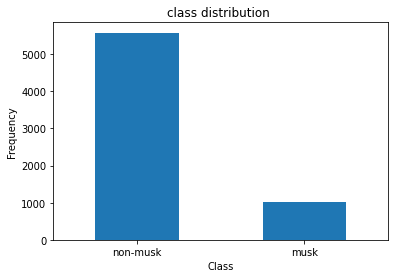

In [14]:
#plot the dataset frequency
labels = ['non-musk', 'musk']
classes = pd.value_counts(data['class'],sort = True)
classes.plot(kind = 'bar', rot = 0)
plt.title("class distribution ")
plt.xticks(range(2), labels )
plt.xlabel("Class")
plt.ylabel("Frequency")

Data Resampling

In [0]:
# Class count
count_class_0, count_class_1 = data['class'].value_counts()

# Divide by class
df_class_0 = data[data['class'] == 0]
df_class_1 = data[data['class'] == 1]

Data over-sampling

Random over-sampling:
1    5581
0    5581
Name: class, dtype: int64


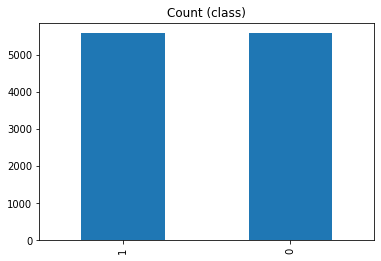

In [16]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['class'].value_counts())

df_test_over['class'].value_counts().plot(kind='bar', title='Count (class)');

In [17]:
df_test_over.shape

(11162, 170)

Careating a new dataframe without ID column and the 49 most important features

In [0]:
new_df = df_test_over[['molecule_name','f36','f92','f66', 'f1','f126','f162','f132','f163','f99', 
'f125', 'f96' ,'f95', 'f124' ,'f102'  ,'f104'  ,'f71' ,       
     'f15',      
'f165',            
'f80'  ,            
'f72'   ,           
'f105'   ,          
'f91'     ,         
'f160'     ,        
'f151'      ,       
'f69'        ,      
'f11'      ,        
'f41'       ,       
'f138'       ,      
'f3'         ,     
'f154'         ,    
'f103'          ,   
'f108'           ,  
'f161'           , 
'f166'             ,
'f25'      ,
'f4'       ,
'f140'      ,  
'f153'       ,  
'f110'        ,  
'f152'         ,  
'f65'           ,
'f123'           ,  
'f44'          ,
'f22'          ,
'f86'          ,
'f130',
'f164',  
'f42',
'class']].copy()

In [30]:
new_df.head(20)
print(new_df.shape)

(11162, 50)


In [34]:
X = new_df.iloc[:,0:49]
Y = new_df.iloc[:,-1]
X.head(2)

,molecule_name,f36,f92,f66,f1,f126,f162,f132,f163,f99,f125,f96,f95,f124,f102,f104,f71,f15,f165,f80,f72,f105,f91,f160,f151,f69,f11,f41,f138,f3,f154,f103,f108,f161,f166,f25,f4,f140,f153,f110,f152,f65,f123,f44,f22,f86,f130,f164,f42
1017,48,211,166,179,114,6,290,-138,143,-156,96,-55,30,-108,266,-284,-139,-284,-117,-166,-82,-292,114,34,-62,-118,-293,-93,-70,-144,83,-257,-120,254,60,111,-77,-33,-113,-248,-122,-146,130,-297,-22,23,-188,-58,161
1018,48,212,163,179,112,6,290,-138,143,-156,94,-54,30,-108,264,-284,-138,-284,-117,-165,-77,-292,111,36,-62,-117,-294,-92,-71,-144,85,-258,-120,255,60,111,-77,-33,-113,-248,-122,-146,130,-297,-22,23,-188,-58,162


In [36]:
Y.head(2)

1017    0
1018    0
Name: class, dtype: int64

In [39]:
#standardize input features 
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.24449478,  2.0187279 ,  1.42971598, ..., -0.93957403,
        -0.14467066,  1.49094244],
       [-0.24449478,  2.03720753,  1.38282351, ..., -0.93957403,
        -0.14467066,  1.50231867],
       [-0.24449478, -0.05099033,  2.47698097, ..., -0.93957403,
        -0.18923077,  1.74121949],
       ...,
       [-1.15169046, -0.58689951, -0.41472088, ...,  0.83856621,
        -0.36747122,  0.72873505],
       [ 1.81731356, -1.45544198, -1.36820095, ..., -0.93957403,
        -0.21151083, -0.84118463],
       [-0.49191178, -0.56841988,  0.85137561, ..., -0.91788939,
         0.14497007,  0.55809161]])

Training the model

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Normalize the testing and training set
X_train = normalize(X_train)
X_test = normalize(X_test)
X_train.shape

(8929, 49)

In [0]:
# Defining the model
my_model = Sequential()
#First layer 

my_model.add(Dense(25,activation= 'relu', kernel_initializer= 'random_normal', input_shape = (49,)))

my_model.add(Dropout(0.5))
#Second layer 
my_model.add(Dense(25, activation='relu', kernel_initializer= 'random_normal'))
my_model.add(Dropout(0.5))

#output
my_model.add(Dense(1, activation='sigmoid', kernel_initializer= 'random_normal'))

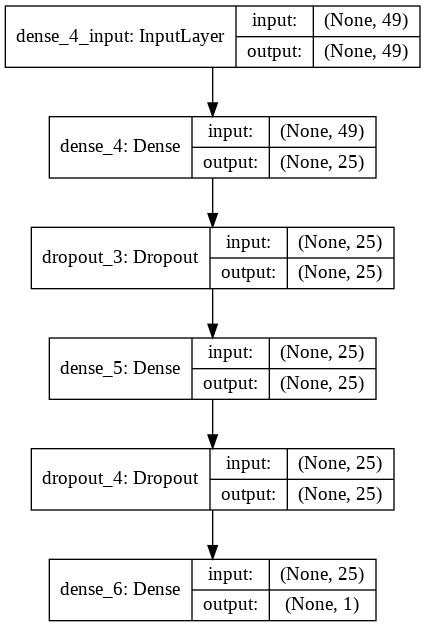

In [58]:

plot_model(my_model , show_shapes= True, expand_nested= True, to_file= 'model.png')


In [0]:
sgd = SGD(lr = 0.01, momentum=0.9)

Accuracy Metrices


In [0]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
my_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['acc',f1_m,precision_m, recall_m])

In [62]:
history = my_model.fit(X_train,Y_train, validation_split= 0.20, batch_size = 32, epochs = 20)

Train on 7143 samples, validate on 1786 samples
Epoch 1/20
7143/7143 [==============================] - 1s 146us/step - loss: 0.5665 - acc: 0.7432 - f1_m: 0.7337 - precision_m: 0.7691 - recall_m: 0.7290 - val_loss: 0.3596 - val_acc: 0.8326 - val_f1_m: 0.8165 - val_precision_m: 0.8792 - val_recall_m: 0.7715
Epoch 2/20
7143/7143 [==============================] - 1s 124us/step - loss: 0.3838 - acc: 0.8380 - f1_m: 0.8325 - precision_m: 0.8409 - recall_m: 0.8346 - val_loss: 0.3207 - val_acc: 0.8723 - val_f1_m: 0.8726 - val_precision_m: 0.8544 - val_recall_m: 0.8983
Epoch 3/20
7143/7143 [==============================] - 1s 124us/step - loss: 0.3567 - acc: 0.8561 - f1_m: 0.8525 - precision_m: 0.8436 - recall_m: 0.8702 - val_loss: 0.2993 - val_acc: 0.8914 - val_f1_m: 0.8914 - val_precision_m: 0.8766 - val_recall_m: 0.9126
Epoch 4/20
7143/7143 [==============================] - 1s 128us/step - loss: 0.3407 - acc: 0.8632 - f1_m: 0.8624 - precision_m: 0.8534 - recall_m: 0.8798 - val_loss: 0.284

In [63]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m', 'loss', 'acc', 'f1_m', 'precision_m', 'recall_m'])


In [65]:
val_accuracy = history.history['val_acc']
#print(val_accuracy)
val_mean_acc = np.mean(val_accuracy)
print(val_mean_acc)


0.9131578922271728


In [67]:
loss, accuracy, f1_score, precision, recall = my_model.evaluate(X_train,Y_train, verbose=0)
print(loss, accuracy, f1_score, precision, recall)


0.1662621651786826 0.9319072961807251 0.9277812242507935 0.9048671722412109 0.9561378359794617


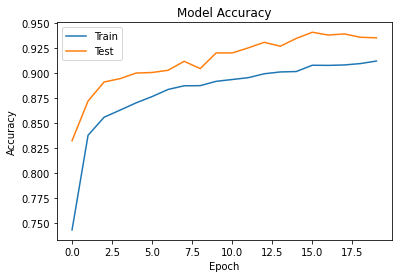

In [68]:
#Plot model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

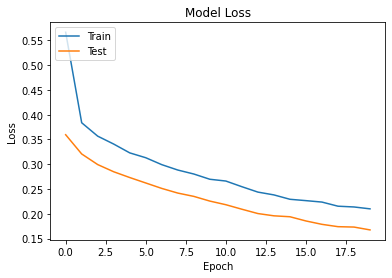

In [69]:
#plot model History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

In [74]:
y_pred = my_model.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)

cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[ 982  106]
 [  53 1092]]


In [75]:
print("Accuracy", accuracy *100)
print("Loss", loss*100)
print("F1- score", f1_score)
print("Recall", recall)
print("Precision", precision)
print("Validation accuracy", val_mean_acc)

Accuracy 93.19072961807251
Loss 16.62621651786826
F1- score 0.9277812242507935
Recall 0.9561378359794617
Precision 0.9048671722412109
Validation accuracy 0.9131578922271728


In [0]:
my_model.save("my_model.h5")